# DSE 230: Programming Assignment 3 - EDA on Airline Data

#### Submission on Gradescope:
  * You need to submit the following two files under "PA3". Instructions to generate the csv files are given in their respective sections
      * The current notebook - **PA3_Starter.ipynb** - with all cells executed
      * csv file containing the top 50 rows of the input dataframe with transformed columns 'MONTH' and 'DAY_OF_WEEK' filtered such that only flights from the largest 10 airports are present - **50_rows.csv**
      
#### IMPORTANT submission guidelines enforced by autograder. Please read carefully:
  * Make sure that all the cells in this notebook are executed and that the outputs are present in the expected cells before submission
  * Some cells are maked **DO NOT DELETE**. These cells cannot be deleted and the output of these cells will be used for autograding
  * You can add additional cells, but the **Expected Output** for each of the tasks MUST be the output of the cells marked as such
  * DO NOT print anything other than the *exact* expected output. **Do not include any sentences/words describing the output**. This is strictly enforced by the autograder which checks for an *exact* match of the expected output. For example, if you are expected to print the PySpark version:
      * '10.9.8' - <span style="color:#093">CORRECT</span>
      * 'The PySpark version is 10.9.8' - <span style="color:#FF0000">INCORRECT</span>
  * You can add cells for printing debugging information anywhere, but do not print anything else in **Expected Output** cells other than the expected output for the task
  * Guidelines for displaying contents of a dataframe in the notebook - Enforced by the autograder-
Use DataFrame.show(n) and pass truncate=True as an argument, to display the entire sentence of a dataframe in the notebook.
**Refrain from using DataFrame.head(n)** as it displays multi-column dataframes in an unintuitive way.
This will be enforced by the autograder. If you have already submitted the notebook using DataFrame.head, please change your code accordingly and re-submit the notebook before the submission deadline.
Note that this will apply to all the programming assignments.
---

Remember: when in doubt, read the documentation first. It's always helpful to search for the class that you're trying to work with, e.g. pyspark.sql.DataFrame. 

PySpark API Documentation: https://spark.apache.org/docs/latest/api/python/index.html

Spark DataFrame Guide:  https://spark.apache.org/docs/latest/sql-programming-guide.html

### General instructions for all plots
1. All plots must have the given title and any descriptive axis labels
2. Title, axis labels and ticks must be readable

In [1]:
import matplotlib.pyplot as plt
import matplotlib

### 1. Start Spark Session

#### **Expected output**: None

In [2]:
# Suppress Hadoop Info looging
!sed -i 's/hadoop.root.logger=INFO,console/hadoop.root.logger=WARN,console/' /usr/hadoop-3.3.2/etc/hadoop/log4j.properties

In [3]:
# Change the number of cores in this code block
# by setting `spark.master` to `local[n]` where
# n is the number of cores
import pyspark
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAll([('spark.master', 'local[4]'),
                                   ('spark.app.name', 'Spark Demo')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

2023-05-20 01:06:25,150 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 2. Load Data

Read data from the `Airline_2016_2018.csv` file using the schema given below and select only 'FL_DATE', 'ORIGIN','CANCELLED','ARR_DELAY' fields
Note: The given csv file is zipped and it needs to be unzipped before it can be loaded
#### **Expected output**: None

In [4]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import StringType, IntegerType, DoubleType, TimestampType

schema = StructType([\
     StructField ('_c0', IntegerType(),True), \
     StructField ('FL_DATE', StringType(),True), \
     StructField ('OP_CARRIER', StringType(),True), \
     StructField ('OP_CARRIER_FL_NUM', IntegerType(),True), \
     StructField ('ORIGIN', StringType(),True), \
     StructField ('DEST', StringType(),True), \
     StructField ('CRS_DEP_TIME', DoubleType(),True), \
     StructField ('DEP_TIME', DoubleType(),True), \
     StructField ('DEP_DELAY', DoubleType(),True), \
     StructField ('TAXI_OUT', DoubleType(),True), \
     StructField ('WHEELS_OFF', DoubleType(),True), \
     StructField ('WHEELS_ON', DoubleType(),True), \
     StructField ('TAXI_IN', DoubleType(),True), \
     StructField ('CRS_ARR_TIME', DoubleType(),True), \
     StructField ('ARR_TIME', DoubleType(),True), \
     StructField ('ARR_DELAY', DoubleType(),True), \
     StructField ('CANCELLED', DoubleType(),True), \
     StructField ('CANCELLATION_CODE', StringType(),True), \
     StructField ('DIVERTED', DoubleType(),True), \
     StructField ('CRS_ELAPSED_TIME', DoubleType(),True), \
     StructField ('ACTUAL_ELAPSED_TIME', DoubleType(),True), \
     StructField ('AIR_TIME', DoubleType(),True), \
     StructField ('DISTANCE', DoubleType(),True), \
     StructField ('CARRIER_DELAY', DoubleType(),True), \
     StructField ('WEATHER_DELAY', DoubleType(),True), \
     StructField ('NAS_DELAY', DoubleType(),True), \
     StructField ('SECURITY_DELAY', DoubleType(),True), \
     StructField ('LATE_AIRCRAFT_DELAY', DoubleType(),True), \
     StructField ('Unnamed: 27', StringType(),True), \
    ])

In [5]:
df = spark.read.load('file:///home/work/PA3_DSE230/Airline_2016_2018.csv', schema=schema, format="csv", header="true"
                    ).select('FL_DATE', 'ORIGIN', 'CANCELLED', 'ARR_DELAY'
                    ).cache()

### 3. Clean the data - 1 points

##### Task:
Remove any rows with null values. Also, remove all cancelled flights and drop the 'CANCELLED' column from the Dataframe after filtering.

Note: Only flights with value of column 'CANCELLED' = 0 must be retained

##### Expected output:
Count of the number rows in the cleaned dataframe

In [6]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
df = df.filter(df.CANCELLED == 0.0).filter("ARR_DELAY is not NULL")
df.count()

18193961

### 4. Date/time transformations - 3 points

##### Tasks
1. Get the day of week (ranging from 1 for a Sunday to a 7 for Saturday) for each row from the 'FL_DATE' column and store it in a column named 'DAY_OF_WEEK'
2. Get the month for each row from the column FL_DATE, cast it to [ShortType](https://spark.apache.org/docs/latest/sql-ref-datatypes.html) and store it in column 'MONTH'

Note: The column 'FL_DATE' has date in YYYY-MM-DD format

Useful functions - [pyspark.sql.functions.dayofweek](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dayofweek.html), [pyspark.sql.functions.split](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.functions.split.html), [pyspark.sql.Column.cast](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.Column.cast.html), [pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

##### **Expected outputs** -  
##### 1. Count of the number of rows with 'MONTH'='01'/1 (depending on whether you do the casting before or after the count)
##### 2. df.dtypes
##### For this cell, since we are asking you to print 2 items, make sure you use print() for printing the items..

In [7]:
# DO NOT DELETE THIS CELL
from pyspark.sql.functions import dayofweek, split
from pyspark.sql.types import ShortType

# YOUR CODE HERE
df = df.withColumn('DAY_OF_WEEK', dayofweek('FL_DATE'))
df = df.withColumn('MONTH', split('FL_DATE', '-')[1].cast(ShortType()))
print(df.select(df.MONTH == 1).count(), df.dtypes)

18193961 [('FL_DATE', 'string'), ('ORIGIN', 'string'), ('CANCELLED', 'double'), ('ARR_DELAY', 'double'), ('DAY_OF_WEEK', 'int'), ('MONTH', 'smallint')]


### 5. Analyze the average delay of flights with time - 4 points

#### 5.1 - Plot average delay across day of the week (2 points)

##### Tasks
1. Calculate average delay for each day of the week
2. Plot a bar plot of the average delays

Useful functions - [pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html), [pyspark.pandas.groupby.GroupBy.mean](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.mean.html)

##### **Expected output** 

The average delay for each day of the week, sorted in ascending order of days (from 1 to 7) with column names 'DAY_OF_WEEK' and 'avg(ARR_DELAY)'

In [8]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
avg_delay = df.groupby('DAY_OF_WEEK').mean().select('DAY_OF_WEEK', 'avg(ARR_DELAY)').orderBy('avg(ARR_DELAY)')
avg_delay.show()

+-----------+------------------+
|DAY_OF_WEEK|    avg(ARR_DELAY)|
+-----------+------------------+
|          7|1.7108687465313566|
|          4|3.1424333618490863|
|          3|3.3163384598356136|
|          1|3.7737294093525184|
|          2| 5.444530377880069|
|          5|5.9276856992941696|
|          6| 6.642405919430463|
+-----------+------------------+



Useful functions - [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
##### **Expected output** A bar plot of average delay for each day of the week titled 'Average delay for each day of the week'

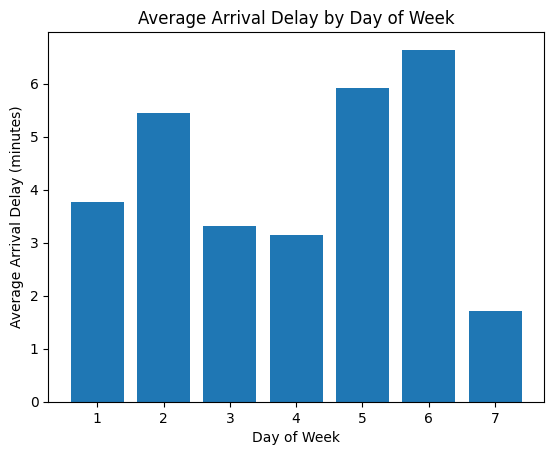

In [9]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
# Note: You can convert your pyspark dataframe to a Pandas DF for plotting using toPandas()
import matplotlib.pyplot as plt

avg_arr_delay = avg_delay.toPandas().set_index('DAY_OF_WEEK')

# Plot the data using matplotlib
plt.bar(avg_arr_delay.index, avg_arr_delay['avg(ARR_DELAY)'])
plt.title('Average delay for each day of the week')

plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Day of Week')

plt.show()

#### 5.2 - Plot average delay across months (2 points)

##### Tasks
1. Calculate average delay for each month
2. Plot a bar plot of the average delays

Useful functions - [pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html), [pyspark.pandas.groupby.GroupBy.mean](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.mean.html), [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

##### **Expected output** 

The average delay for each month, sorted in ascending order of months (1-12) with column names 'MONTH' and 'avg(ARR_DELAY)'

In [10]:
# DO NOT DELETE THIS CELL
avg_delay_month = df.groupby('MONTH').mean().select('MONTH', 'avg(ARR_DELAY)').orderBy('MONTH')
avg_delay_month.show()

+-----+------------------+
|MONTH|    avg(ARR_DELAY)|
+-----+------------------+
|    1|3.7097001560612197|
|    2|1.8300920555974287|
|    3| 3.077865450788572|
|    4|3.8589497130379833|
|    5| 4.807768281223031|
|    6| 8.284220482437311|
|    7|  9.23902074539651|
|    8| 8.274225097849687|
|    9|1.0720231942210179|
|   10|1.4037450468983736|
|   11|0.5211419983552131|
|   12| 5.027310078897863|
+-----+------------------+



##### **Expected output** A bar plot of average delay for each month titled 'Average delay for each month'

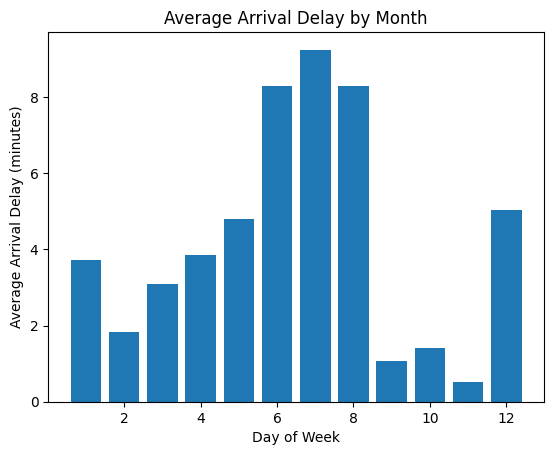

In [11]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
# Note: You can convert your pyspark dataframe to a Pandas DF for plotting using toPandas()
avg_delay_month_df = avg_delay_month.toPandas().set_index('MONTH')

# Plot the data using matplotlib
plt.bar(avg_delay_month_df.index, avg_delay_month_df['avg(ARR_DELAY)'])
plt.title('Average delay for each month')

plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Month')

plt.show()

### 6. Get a list of the 10 largest airports - 2 points

##### Tasks
1. Count the number of flights originating from each airport and sort in descending order by count
2. Get the largest 10 airports from this sorted dataframe

Useful functions - [pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html), [pyspark.pandas.groupby.GroupBy.count](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.groupby.GroupBy.count.html)

##### **Expected output** The top 10 airports and the count of flights originating from them under column names 'ORIGIN' and 'count'


In [12]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
airport_counts = df.groupby('ORIGIN').count().withColumnRenamed('count', 'count(ORIGINS)').select('ORIGIN', 'count(ORIGINS)').orderBy('count(ORIGINS)', ascending=False)
airport_counts.show(10)

+------+--------------+
|ORIGIN|count(ORIGINS)|
+------+--------------+
|   ATL|       1126019|
|   ORD|        826445|
|   DEN|        677307|
|   DFW|        645478|
|   LAX|        641315|
|   SFO|        513398|
|   PHX|        483470|
|   LAS|        458871|
|   CLT|        447668|
|   IAH|        432031|
+------+--------------+
only showing top 10 rows



### 7. Get the average delay of flights in the Top 10 airports - 8 points

#### 7.1 - Filter the dataframe by the top 10 airports (2 points)

Useful functions - [pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html), [pyspark.sql.Column.isin](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.Column.isin.html)

##### **Expected output** -  The top 25 rows of the filtered dataframe i.e. the dataframe containing only the Top 10 airports in the 'ORIGIN' column

Your output should look like this:

|   FL_DATE|ORIGIN|ARR_DELAY|DAY_OF_WEEK|MONTH|
| ---------|------|---------|-----------|-----|
|2016-01-01|   ATL|     -2.0|          6|    1|
|2016-01-01|   LAX|    -13.0|          6|    1|
..23 more

In [13]:
# DO NOT DELETE THIS CELL
from pyspark.sql.functions import col
# YOUR CODE HERE
# Hint: You can convert the top 10 airports Pyspark DF to a Pandas DF using toPandas() and then convert it into a 
# list to allow easy filtering. Make sure you only call toPandas() on the filtered Spark DF
top_ten_airports = list(airport_counts.limit(10).toPandas().ORIGIN)
top_ten_df = df[df.ORIGIN.isin(top_ten_airports)]
top_ten_df.show(25)

+----------+------+---------+---------+-----------+-----+
|   FL_DATE|ORIGIN|CANCELLED|ARR_DELAY|DAY_OF_WEEK|MONTH|
+----------+------+---------+---------+-----------+-----+
|2016-01-01|   ATL|      0.0|     -2.0|          6|    1|
|2016-01-01|   LAX|      0.0|    -13.0|          6|    1|
|2016-01-01|   ATL|      0.0|     83.0|          6|    1|
|2016-01-01|   ATL|      0.0|      3.0|          6|    1|
|2016-01-01|   ATL|      0.0|    -12.0|          6|    1|
|2016-01-01|   LAX|      0.0|    -14.0|          6|    1|
|2016-01-01|   ATL|      0.0|    -11.0|          6|    1|
|2016-01-01|   ATL|      0.0|    -10.0|          6|    1|
|2016-01-01|   ATL|      0.0|     -2.0|          6|    1|
|2016-01-01|   ATL|      0.0|    -16.0|          6|    1|
|2016-01-01|   DEN|      0.0|     -4.0|          6|    1|
|2016-01-01|   ATL|      0.0|     -6.0|          6|    1|
|2016-01-01|   ATL|      0.0|     -9.0|          6|    1|
|2016-01-01|   ATL|      0.0|      2.0|          6|    1|
|2016-01-01|  

#### 7.2 - Compute the average delay at each of the Top 10 airports (2 points)

Useful functions - [pyspark.sql.functions.mean](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.mean.html), [pyspark.sql.functions.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.count.html)

##### **Expected output** -   The top 10 airports, the count of flights originating from them and the average delay at each airport under column names 'ORIGIN','count(ORIGIN)' and 'avg(ARR_DELAY)'. Sort your results by count(ORIGIN) in ascending order.

In [14]:
# DO NOT DELETE THIS CELL
from pyspark.sql.functions import mean, count
# YOUR CODE HERE
avg_delay_top_ten = top_ten_df.groupBy('ORIGIN').agg(mean('ARR_DELAY'), count('ORIGIN'))
avg_delay_top_ten.show()

+------+------------------+-------------+
|ORIGIN|    avg(ARR_DELAY)|count(ORIGIN)|
+------+------------------+-------------+
|   IAH|2.5060447051253267|       432031|
|   LAS|  4.93509068997605|       458871|
|   DEN|  4.13971360107012|       677307|
|   CLT| 5.826940947309167|       447668|
|   PHX| 3.269476906529878|       483470|
|   DFW| 8.286187910354807|       645478|
|   SFO| 7.548603617466371|       513398|
|   ATL| 2.982682352606839|      1126019|
|   ORD| 8.238972950408073|       826445|
|   LAX| 4.637327990145248|       641315|
+------+------------------+-------------+



#### 7.3 - Summary statistics (1 point)

##### **Expected output** - The summary statistics (count, mean, std, min and max) of the average delay dataframe from the previous cell

In [15]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
avg_delay_top_ten.describe().show()

+-------+------+------------------+------------------+
|summary|ORIGIN|    avg(ARR_DELAY)|     count(ORIGIN)|
+-------+------+------------------+------------------+
|  count|    10|                10|                10|
|   mean|  null| 5.237104167099188|          625200.2|
| stddev|  null|2.1619676017248945|216997.06620484783|
|    min|   ATL|2.5060447051253267|            432031|
|    max|   SFO| 8.286187910354807|           1126019|
+-------+------+------------------+------------------+



#### 7.4 - Plot average delay for the Top 10 airports (2 points)

##### Tasks
1. Sort the Top 10 airports in descending order by count of flights originating from each airport
2. Plot a bar plot of the average delays

Useful functions - [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

##### **Expected output** A bar plot of average delay for each of the Top 10 airports titled 'Average delay in the top 10 airports'

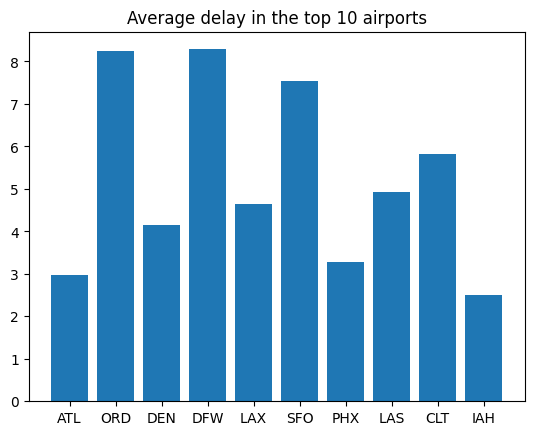

In [16]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE

avg_delay_top_ten_pd = avg_delay_top_ten.sort("count(ORIGIN)", ascending=False).toPandas()
plt.bar(avg_delay_top_ten_pd['ORIGIN'], avg_delay_top_ten_pd['avg(ARR_DELAY)'] )
plt.title('Average delay in the top 10 airports')
plt.show()
# Hint: Convert your Pyspark DF to a pandas DF for easy plotting using toPandas()

#### 7.5 - Save the filtered DataFrame as a CSV file on the local filesystem ( 1 point)

**NOTE**: Spark uses a distributed memory system, and stores working data in fragments known as "partitions". This is advantageous when a Spark cluster spans multiple machines, as each machine will only require part of the working data to do its own job. By default, Spark will save each of these data partitions into a individual file to avoid I/O collisions. We want only one output file, so we'll need to fuse all the data into a single partition first. 

Your task: 
1. Coalesce the dataframe from **step 7.1** to one partition using `DataFrame.coalesce(1)`. This returns a 1-partition dataframe. This makes sure that all our results will end up in the same csv file. 
2. Save the 1-partition dataframe to your local filesystem using the `DataFrame.write.csv(<path>)` method. Remember that you need "file://\<path\>/\<filename\>" when writing to the local file system.
3. We want you to submit a CSV containing the first 50 rows of the results file. To do this, use the command `head -n 50 results.csv > 50_rows.csv`. You can also do so manually, since CSV files are in plain text. Remember that we want the first 50 lines which would include the header as well - so basically it is header + 49 rows.
4. In your local filesystem, you should see a folder with the specified \<filename\>. Since we made sure to coalesce our dataframe to just one partition, we should expect to find only one saved partition in this folder, saved also as a CSV. Note the name of this file, it should look something like `part-00000-xx.....xx.csv`. You may rename this file to something more interpretable - let's say `results.csv`. 
5. We want you to submit a CSV containing the first 50 rows of the results file. To do this, use the command `head -n 50 results.csv > 50_rows.csv`. You can also do so manually, since CSV files are in plain text. Remember that we want the first 50 lines which would include the header as well - so basically it is header + 49 rows.

**REMINDER**: The results are saved to your local filesystem and the folder where you executed your launch script is mapped to the '/home/work' directory in your Docker container. You can read more about this mapping here - https://docs.docker.com/storage/bind-mounts//home/work

##### **Expected output**: None

In [17]:
# YOUR CODE HERE
partition = top_ten_df.coalesce(1)
partition.write.option("header", "true").csv("file:///home/work/PA3_DSE230/results.csv")

#### **Expected output**: List of files in the directory where results were written out by PySpark. You should see a 'SUCCESS' folder in this directory

In [18]:
# DO NOT DELETE THIS CELL
# YOUR CODE HERE
! ls results.csv

_SUCCESS  part-00000-6dba5d86-d1c1-4c57-be59-034ef39dde44-c000.csv


In [19]:
# Stop Spark session
spark.stop()

### 8. Submission of `50_rows.csv` - 2 points

#### **Expected output**(in the 50_rows.csv file) - Top 49 rows of the Dataframe filtered by Top 10 airports
**NOTE** - No output is expected in the notebook

The csv file should have five columns, `FL_DATE`, `ORIGIN`, `ARR_DELAY`, `DAY_OF_WEEK`, `MONTH`, in the first line and 49 more lines with the top 49 rows of the filtered dataframe.